# Chapter 9 - Plotting and visualization

## 9.1 matplotlib API primer

With matplotlib, we use the following import convention.

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

Creating simple plot.

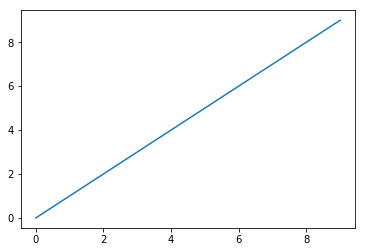

In [3]:
import numpy as np

x = np.arange(10)

plt.plot(x)

## 9.1.1 Figures and Subplots


### Figure interface

Plots in matplotlib reside within a Figure object. You can create a new figure with
plt.figure.

In [4]:
fig = plt.figure()

You can’t make a plot with a blank figure. You have to create one or more subplots
using add_subplot.

You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot. This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
selecting the first of four subplots (numbered from 1). If you create the next two subplots,
you’ll end up with a visualization that looks like this.

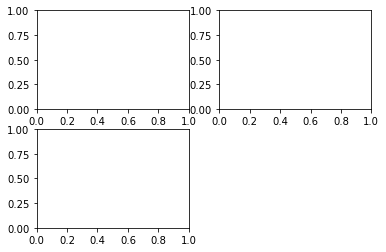

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot.

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib
draws on the last figure and subplot used (creating one if necessary), thus hiding
the figure and subplot creation. So if we add the following command, you’ll get
something like Figure 9-3. The 'k--' is a style option instructing matplotlib to plot a black dashed line.

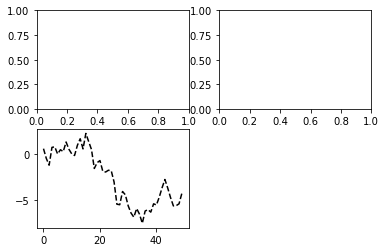

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

The
objects returned by fig.add_subplot here are AxesSubplot objects, on which you
can directly plot on the other empty subplots by calling each one’s instance method
(see Figure 9-4).

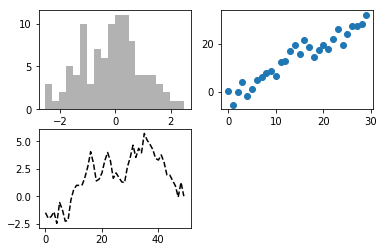

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), 'k--')

### Subplots interface

Creating a figure with a grid of subplots is a very common task, so matplotlib
includes a convenience method, plt.subplots, that creates a new figure and returns
a NumPy array containing the created subplot objects.

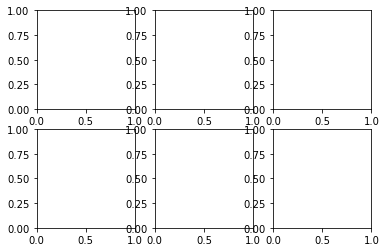

In [20]:
fig, axes = plt.subplots(2, 3)

In [23]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159ea630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1162d2748>]], dtype=object)

In [24]:
axes.shape

(2, 3)

This is very useful, as the axes array can be easily indexed like a two-dimensional
array; for example, axes[0, 1].

You can also indicate that subplots should have the
same x- or y-axis using sharex and sharey, respectively. This is especially useful
when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot
limits independently. See Table 9-1 for more on this method.

```
nrows     Number of rows of subplots

ncols     Number of columns of subplots

sharex    All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)

sharey    All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)

subplot_kw Dict of keywords passed to add_subplot call used to create each subplot

**fig_kw  Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))
```

### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the
subplots and spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself. You can
change the spacing using the subplots_adjust method on Figure objects, also available
as a top-level function.

subplots_adjust(left=None, bottom=None, right=None, top=None,
wspace=None, hspace=None)

wspace and hspace controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots.

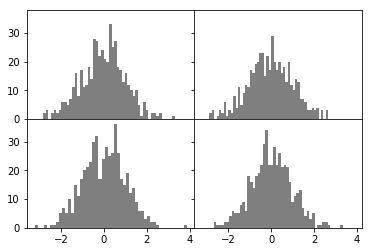

In [25]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color="k", alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

You may notice that the axis labels overlap. matplotlib doesn’t check whether the
labels overlap, so in a case like this you would need to fix the labels yourself by specifying
explicit tick locations and tick labels.

## 9.1.2 Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a
string abbreviation indicating color and line style. For example, to plot x versus y
with green dashes, you would execute.

In [ ]:
ax.plot(x, y, "g--")

This way of specifying both color and line style in a string is provided as a convenience;
in practice if you were creating plots programmatically you might prefer not
to have to munge strings together to create plots with the desired style. The same plot
could also have been expressed more explicitly as.

In [ ]:
ax.plot(x, y, linestyle="--", color="g")

There are a number of color abbreviations provided for commonly used colors, but
you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE').
You can see the full set of line styles by looking at the docstring for plot (use plot? in
IPython or Jupyter).

In [26]:
plt.plot?

Line plots can additionally have markers to highlight the actual data points. Since
matplotlib creates a continuous line plot, interpolating between points, it can occasionally
be unclear where the points lie. The marker can be part of the style string,
which must have color followed by marker type and line style (see Figure 9-6).

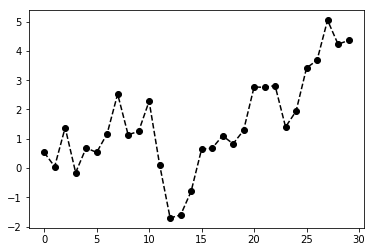

In [27]:
plt.plot(np.random.randn(30).cumsum(), "ko--")

This could also have been written more explicitly as.

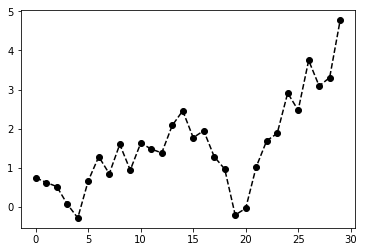

In [29]:
plt.plot(np.random.randn(30).cumsum(), color="k", linestyle="dashed", marker="o")

For line plots, you will notice that subsequent points are linearly interpolated by
default. This can be altered with the drawstyle option.

In [30]:
data = np.random.randn(30).cumsum()

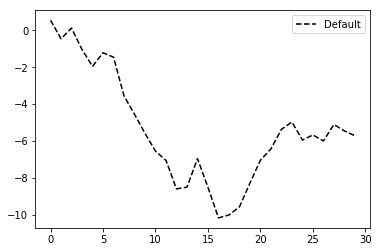

In [35]:
plt.plot(data, "k--", label="Default")
plt.legend(loc='best')

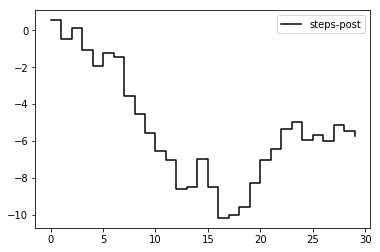

In [34]:
plt.plot(data, "k-", drawstyle="steps-post", label="steps-post")
plt.legend(loc='best')

You must call plt.legend (or ax.legend, if you have a reference to
the axes) to create the legend, whether or not you passed the label
options when plotting the data.

## 9.1.3 Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (i.e., matplotlib.pyplot) and the more object-oriented
native matplotlib API.

The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:

* Called with no arguments returns the current parameter value (e.g., plt.xlim()
returns the current x-axis plotting range)
* Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets
the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each of
them corresponds to two methods on the subplot object itself; in the case of xlim
these are ax.get_xlim and ax.set_xlim. I prefer to use the subplot instance methods
myself in the interest of being explicit (and especially when working with multiple
subplots), but you can certainly use whichever you find more convenient.

### Setting the title, axis labels, ticks, and ticklabels

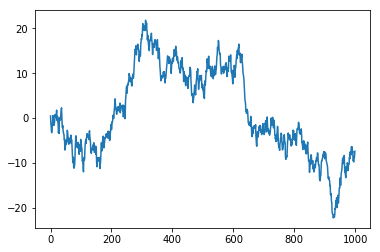

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels
using set_xticklabels:

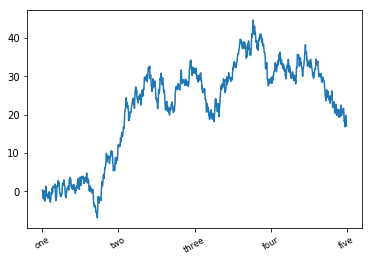

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize="small")

The rotation option sets the x tick labels at a 30-degree rotation. Lastly, set_xlabel
gives a name to the x-axis and set_title the subplot title (see Figure 9-9 for the
resulting figure):

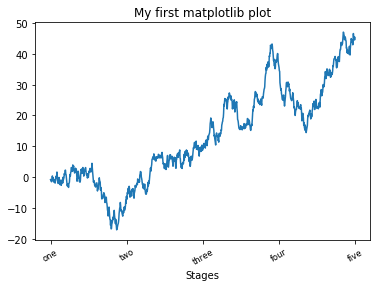

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize="small")
ax.set_title("My first matplotlib plot")
ax.set_xlabel("Stages")

Modifying the y-axis consists of the same process, substituting y for x in the above.

The axes class has a set method that allows batch setting of plot properties. From the
prior example, we could also have written.

[<matplotlib.text.Text at 0x117671fd0>, <matplotlib.text.Text at 0x1174e4e10>]

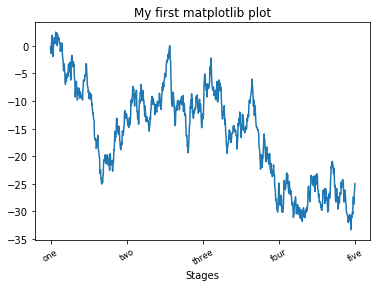

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize="small")
props = {
    "title": "My first matplotlib plot",
    "xlabel": "Stages"
}
ax.set(**props)

### Adding legends

Legends are another critical element for identifying plot elements. There are a couple
of ways to add one. The easiest is to pass the label argument when adding each piece
of the plot.

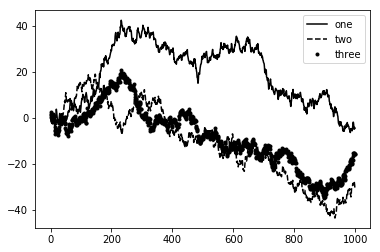

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), "k", label="one")
ax.plot(np.random.randn(1000).cumsum(), "k--", label="two")
ax.plot(np.random.randn(1000).cumsum(), "k.", label="three")
ax.legend(loc="best")
# plt.legend()

The legend method has several other choices for the location loc argument. See the
docstring (with ax.legend?) for more information.

In [48]:
ax.legend?

The loc tells matplotlib where to place the plot. If you aren’t picky, 'best' is a good
option, as it will choose a location that is most out of the way. To exclude one or more
elements from the legend, pass no label or label='_nolegend_'.

## 9.1.4 Annotations and Drawing on a Subplot

## 9.1.5 Saving Plots to File

## 9.1.6 matplotlib Configuration